In [29]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [11]:
data_path = Path.cwd().parent / "data" / "processed" / "listings_regular_license.parquet"

In [12]:
df = pd.read_parquet(data_path, engine="pyarrow")

In [13]:
df.shape

(4449, 47)

In [16]:
df.columns

Index(['id', 'name', 'host_id', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_identity_verified', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'availability_eoy',
       'number_of_reviews_ly', 'estimated_occupancy_l365d',
       'estimated_revenue_l365d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
       'rev

In [ ]:
df_calendar = 

### Create h4 dataset

In [17]:
df["Host_Category"] = pd.cut(
    df["host_total_listings_count"],
    bins=[0, 1, 3, float("inf")],
    right=True,
    labels=["Individual (1)", "Small Multi (2-3)", "Large Multi (4+)"]
).astype(str).fillna("Unknown")

In [18]:
h4_data = df[[
    'id', 'host_id', 'host_total_listings_count', 'Host_Category',
    
    # Performance metrics
    'estimated_occupancy_l365d',
    'estimated_revenue_l365d', 
    'number_of_reviews_ltm',
    
    # Availability strategy
    'availability_365',
    'instant_bookable',
    'has_availability',
    
    # Quality signals
    'review_scores_rating',
    'review_scores_value',
    
    # Control variables
    'neighbourhood_cleansed',
    'host_is_superhost'
]]

In [33]:
# Don't use arbitrary cutoffs - find natural breaks
availability_bins = [0, 90, 180, 270, 365]
labels = ['Seasonal (<90)', 'Limited (90-180)', 
          'Moderate (180-270)', 'Year-Round (270+)']

h4_data["availability_category"] = pd.cut(
    df["availability_365"],
    bins=availability_bins,
    right=True,
    labels=labels
).astype(str).fillna("Unknown")

/tmp/ipykernel_13508/2475272905.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h4_data["availability_category"] = pd.cut(


In [ ]:
h4_data["availability_category"] = 

In [19]:
h4_data

,id,host_id,host_total_listings_count,Host_Category,estimated_occupancy_l365d,estimated_revenue_l365d,number_of_reviews_ltm,availability_365,instant_bookable,has_availability,review_scores_rating,review_scores_value,neighbourhood_cleansed,host_is_superhost
0,PROP_BD43,HOST_EA8B,2,Small Multi (2-3),0,NaN,0,0,False,None,4.00,5.00,Kalamaria,False
1,PROP_B6D8,HOST_723A,1,Individual (1),138,7176.0,23,356,False,True,4.81,4.75,Thessaloniki,True
2,PROP_6279,HOST_D51E,104,Large Multi (4+),40,1480.0,1,84,True,True,4.74,4.83,Neapolis – Sykeon,True
3,PROP_28B3,HOST_33A5,2,Small Multi (2-3),0,0.0,0,266,False,True,4.86,4.29,Pilea – Chortiatis,False
4,PROP_2317,HOST_CBBB,2,Small Multi (2-3),12,552.0,2,331,False,True,4.70,4.63,Thessaloniki,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,PROP_29BB,HOST_D51E,104,Large Multi (4+),0,0.0,0,329,True,True,NaN,NaN,Thessaloniki,True
4445,PROP_F9CD,HOST_C1D9,93,Large Multi (4+),0,0.0,0,365,True,True,NaN,NaN,Thessaloniki,False
4446,PROP_5C9A,HOST_583E,67,Large Multi (4+),0,0.0,0,357,True,True,NaN,NaN,Thessaloniki,True
4447,PROP_F90D,HOST_5B4E,1,Individual (1),0,0.0,0,309,False,True,NaN,NaN,Thessaloniki,False


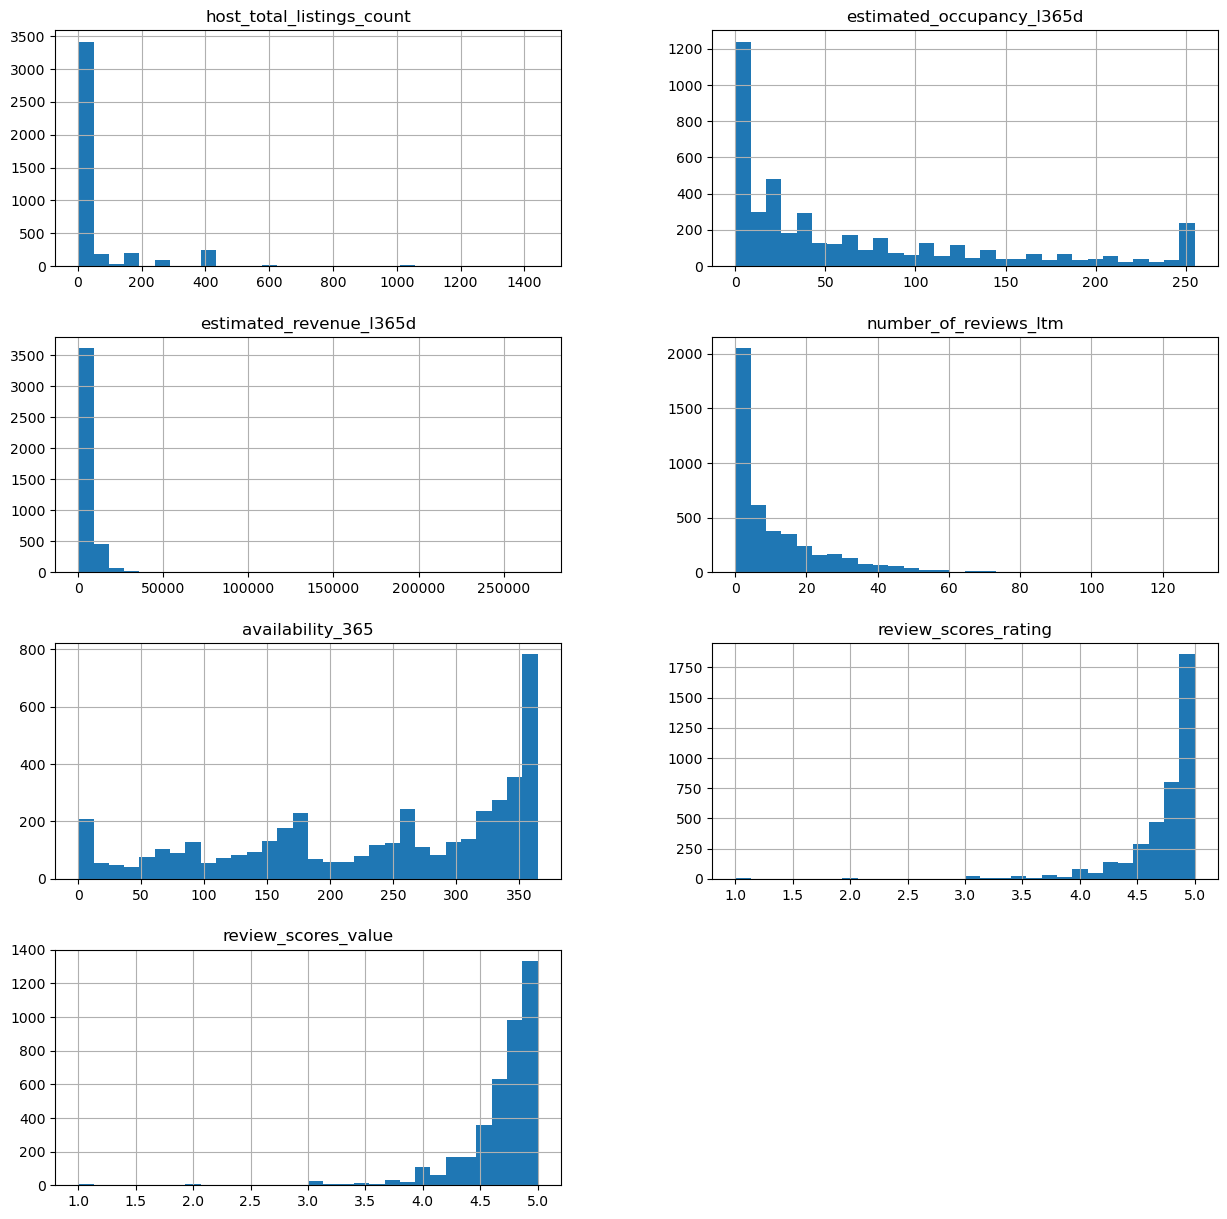

In [21]:
h4_data.hist(bins=30, figsize=(15, 15), layout=(4, 2));

<hr>

### Categorical Variables

Column: Host_Category
NA % : 0.0
Host_Category
Large Multi (4+)     0.528433
Individual (1)       0.242077
Small Multi (2-3)    0.178018
nan                  0.051472
Name: proportion, dtype: float64




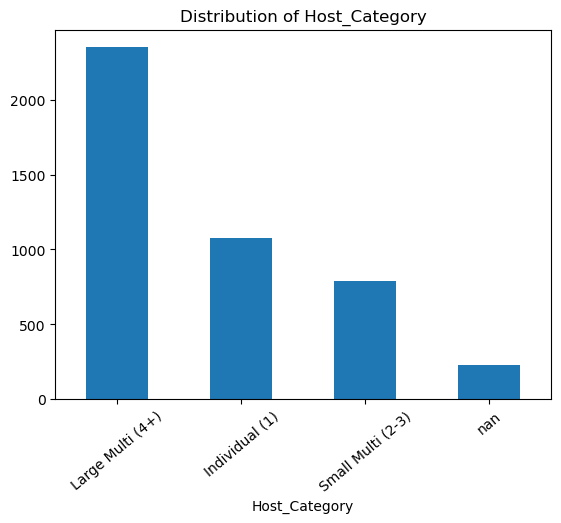




Column: has_availability
NA % : 0.005
has_availability
True    1.0
Name: proportion, dtype: float64




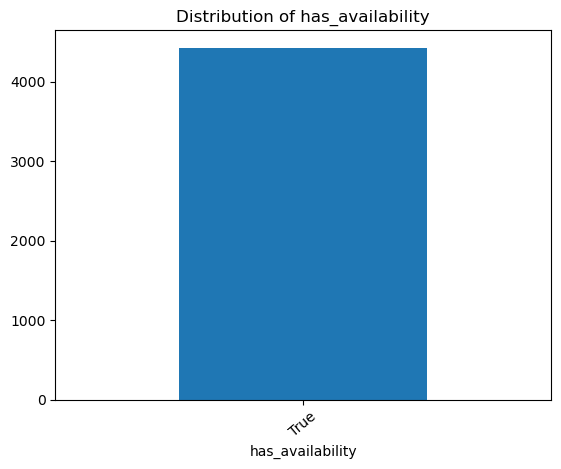




Column: host_is_superhost
NA % : 0.076
host_is_superhost
False    0.628863
True     0.371137
Name: proportion, dtype: float64




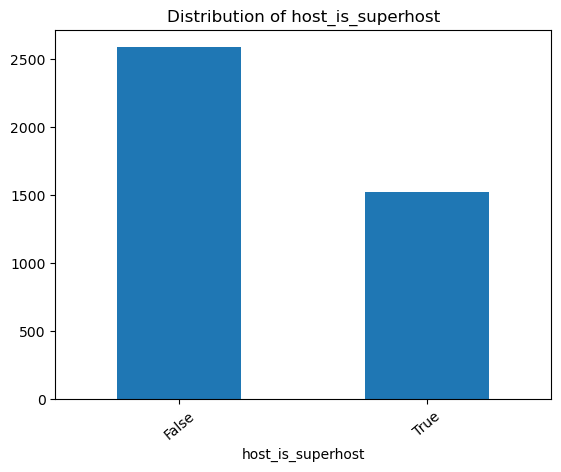

In [32]:
for col in h4_data.drop(columns=['id', 'host_id']).columns:
    if h4_data[col].dtype == 'object':
        print(f"Column: {col}")
        print(f"NA % : {round(h4_data[col].isna().sum() / len(h4_data), 3)}")
        print(h4_data[col].value_counts(normalize=True))
        print("\n")
        h4_data[col].value_counts().plot.bar(rot=40)
        plt.title(f"Distribution of {col}")
        plt.show()
        print("\n\n")

        print("=" * 80)

## Numerical variables

In [ ]:
for col in h4_data.columns:
    if X_train[col].dtype != 'object':
        
        print(f"Column: {col}")
        print(X_train[col].describe())
        print("\n")
        print(f"Null values: {X_train[col].isnull().sum()}")
        print(f"Null percentage: {X_train[col].isnull().mean():.2%}")
        print("\n")
        
        plot_numeric_univariate(X_train[col], col)
        
        plot_numeric_by_category(col, "class", df[col], y_train)
        
        t_test_results = t_test_numeric_categorical(df[col], y_train)
        
        
        print("=" * 70)
        print(f"T-TEST: {col} by class")
        print("=" * 70)
        print(f"\nDescriptive Statistics:")
        for cat, stats in t_test_results['descriptive_stats'].items():
            print(f"\n  Group {cat}:")
            print(f"    Mean: {stats['mean']:.2f}")
            print(f"    Std Dev: {stats['std']:.2f}")
            print(f"    Median: {stats['median']:.2f}")
            print(f"    N: {stats['n']}")

        print(f"\nT-test Results:")
        print(f"  T-statistic: {t_test_results['t_statistic']:.4f}")
        print(f"  P-value: {t_test_results['p_value']:.6f}")
        print(f"  Cohen's d: {t_test_results['cohens_d']:.3f}")
        print(f"  Effect size: {t_test_results['effect_interpretation']}")
        print(f"  Significant at α=0.05: {'YES' if t_test_results['is_significant'] else 'NO'}")

        print(f"\nInterpretation:")
        print(f"  {t_test_results['interpretation']}")
                
        print("=" * 80)
        print("\n\n")

<hr>

### Functions

In [23]:
def plot_categorical_categorical(contingency, col1, col2):
        """Create heatmap and stacked bar chart for categorical relationships."""
        fig, axes = plt.subplots(2, 1, figsize=(14, 16))
        
        # Heatmap
        sns.heatmap(contingency, annot=True, fmt='d', cmap='YlOrRd', 
                   ax=axes[0], cbar_kws={'label': 'Count'})
        axes[0].set_title(f'Contingency Table: {col1} vs {col2}')
        axes[0].set_xlabel(col2)
        axes[0].set_ylabel(col1)
        
        # Stacked bar chart (proportions)
        contingency_pct = contingency.div(contingency.sum(axis=1), axis=0)
        contingency_pct.plot(kind='bar', stacked=True, ax=axes[1], 
                           colormap='viridis', alpha=0.8)
        axes[1].set_title(f'Proportional Distribution')
        axes[1].set_xlabel(col1)
        axes[1].set_ylabel('Proportion')
        axes[1].legend(title=col2, bbox_to_anchor=(1.05, 1), loc='upper left')
        
        plt.tight_layout()
        plt.show()

In [ ]:
from scipy.stats import ttest_ind, levene, shapiro, probplot

def t_test_numeric_categorical(numeric_data, categorical_data, alpha=0.05):
    """
    Perform t-test to compare means of a numeric variable across categorical groups.
    
    Parameters:
    -----------
    numeric_data : pd.Series
        Numeric variable data
    categorical_data : pd.Series
        Categorical variable data (should have 2 groups for t-test)
    alpha : float, default=0.05
        Significance level
        
    Returns:
    --------
    dict : Dictionary containing test results
    """
    
    # Get column names from Series
    numeric_col = numeric_data.name if numeric_data.name else 'numeric_variable'
    cat_col = categorical_data.name if categorical_data.name else 'categorical_variable'
    
    # Combine data and remove NaN
    combined_df = pd.DataFrame({numeric_col: numeric_data, cat_col: categorical_data})
    combined_df = combined_df.dropna()
    
    # Get unique categories
    categories = combined_df[cat_col].unique()
    
    if len(categories) != 2:
        return {
            'error': f'T-test requires exactly 2 groups. Found {len(categories)} groups. Use ANOVA for multiple groups.'
        }
    
    # Split data into two groups
    group1 = combined_df[combined_df[cat_col] == categories[0]][numeric_col]
    group2 = combined_df[combined_df[cat_col] == categories[1]][numeric_col]
    
    # Descriptive statistics
    desc_stats = {
        categories[0]: {
            'mean': group1.mean(),
            'std': group1.std(),
            'n': len(group1),
            'median': group1.median()
        },
        categories[1]: {
            'mean': group2.mean(),
            'std': group2.std(),
            'n': len(group2),
            'median': group2.median()
        }
    }
    
    # Test for equal variances (Levene's test)
    levene_stat, levene_p = levene(group1, group2)
    equal_var = levene_p > alpha
    
    # Test for normality (if sample size allows)
    normality_group1 = normality_group2 = None
    if len(group1) >= 3:
        _, normality_group1 = shapiro(group1)
    if len(group2) >= 3:
        _, normality_group2 = shapiro(group2)
    
    # Perform t-test
    t_stat, p_value = ttest_ind(group1, group2, equal_var=equal_var)
    
    # Calculate effect size (Cohen's d)
    pooled_std = np.sqrt(((len(group1)-1)*group1.std()**2 + (len(group2)-1)*group2.std()**2) / 
                         (len(group1) + len(group2) - 2))
    cohens_d = (group1.mean() - group2.mean()) / pooled_std
    
    # Interpret effect size
    if abs(cohens_d) < 0.2:
        effect_interpretation = "Negligible effect"
    elif abs(cohens_d) < 0.5:
        effect_interpretation = "Small effect"
    elif abs(cohens_d) < 0.8:
        effect_interpretation = "Medium effect"
    else:
        effect_interpretation = "Large effect"
    
    # Overall interpretation
    is_significant = p_value < alpha
    if is_significant:
        direction = "higher" if group1.mean() > group2.mean() else "lower"
        interpretation = f"SIGNIFICANT difference detected (p={p_value:.6f}). " \
                        f"{categories[0]} has {direction} mean {numeric_col} than {categories[1]}. " \
                        f"{effect_interpretation} (Cohen's d = {cohens_d:.3f})."
    else:
        interpretation = f"NO significant difference (p={p_value:.6f}). " \
                        f"Mean {numeric_col} is similar across groups."
    
    # Add assumption warnings
    warnings = []
    if not equal_var:
        warnings.append(f"⚠️ Unequal variances detected (Levene's p={levene_p:.4f}). Welch's t-test was used.")
    if normality_group1 is not None and normality_group1 < alpha:
        warnings.append(f"⚠️ Group '{categories[0]}' may not be normally distributed (Shapiro p={normality_group1:.4f}).")
    if normality_group2 is not None and normality_group2 < alpha:
        warnings.append(f"⚠️ Group '{categories[1]}' may not be normally distributed (Shapiro p={normality_group2:.4f}).")
    
    if warnings:
        interpretation += "\n" + "\n".join(warnings)
    
    results = {
        't_statistic': t_stat,
        'p_value': p_value,
        'is_significant': is_significant,
        'cohens_d': cohens_d,
        'effect_interpretation': effect_interpretation,
        'descriptive_stats': desc_stats,
        'equal_variances': equal_var,
        'levene_test': {'statistic': levene_stat, 'p_value': levene_p},
        'interpretation': interpretation,
        'categories': categories,
        'numeric_variable': numeric_col,
        'categorical_variable': cat_col
    }
    
    return results


# Test with credit_amount and class
t_test_results = t_test_numeric_categorical(
    df['credit_amount'], 
    df['class'], 
    
)

print("=" * 70)
print(f"T-TEST: credit_amount by class")
print("=" * 70)
print(f"\nDescriptive Statistics:")
for cat, stats in t_test_results['descriptive_stats'].items():
    print(f"\n  Group {cat}:")
    print(f"    Mean: {stats['mean']:.2f}")
    print(f"    Std Dev: {stats['std']:.2f}")
    print(f"    Median: {stats['median']:.2f}")
    print(f"    N: {stats['n']}")

print(f"\nT-test Results:")
print(f"  T-statistic: {t_test_results['t_statistic']:.4f}")
print(f"  P-value: {t_test_results['p_value']:.6f}")
print(f"  Cohen's d: {t_test_results['cohens_d']:.3f}")
print(f"  Effect size: {t_test_results['effect_interpretation']}")
print(f"  Significant at α=0.05: {'YES' if t_test_results['is_significant'] else 'NO'}")

print(f"\nInterpretation:")
print(f"  {t_test_results['interpretation']}")

In [24]:
def plot_numeric_by_category(numeric_col, cat_col, numeric_data, cat_data):
    """
    Create box plots and violin plots comparing numeric variable across categorical groups.
    
    Parameters:
    -----------
    numeric_col : str
        Name of the numeric variable
    cat_col : str
        Name of the categorical variable
    numeric_data : pd.Series
        Numeric variable data
    cat_data : pd.Series
        Categorical variable data
    """
    # Combine data and remove NaN
    combined_df = pd.DataFrame({numeric_col: numeric_data, cat_col: cat_data})
    combined_df = combined_df.dropna()
    
    # Get unique categories and prepare groups
    categories = sorted(combined_df[cat_col].unique())
    groups = [combined_df[combined_df[cat_col] == cat][numeric_col].values for cat in categories]
    
    # Create figure with subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Box plot
    bp = axes[0].boxplot(groups, tick_labels=categories, patch_artist=True)
    colors = sns.color_palette('Set3', len(groups))
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    axes[0].set_xlabel(cat_col)
    axes[0].set_ylabel(numeric_col)
    axes[0].set_title(f'{numeric_col} by {cat_col} - Box Plot')
    axes[0].tick_params(axis='x', rotation=0)
    
    # Violin plot with individual points
    parts = axes[1].violinplot(groups, positions=range(len(groups)), 
                              showmeans=True, showmedians=True)
    for i, (group, color) in enumerate(zip(groups, colors)):
        # Add jittered points
        y = group
        x = np.random.normal(i, 0.04, size=len(y))
        axes[1].scatter(x, y, alpha=0.3, s=20, color=color)
    
    axes[1].set_xticks(range(len(groups)))
    axes[1].set_xticklabels(categories)
    axes[1].set_xlabel(cat_col)
    axes[1].set_ylabel(numeric_col)
    axes[1].set_title(f'{numeric_col} by {cat_col} - Violin Plot with Points')
    axes[1].tick_params(axis='x', rotation=0)
    
    plt.tight_layout()
    plt.show()

In [26]:
def distribution_comparison(df: pd.DataFrame, columns: List[str], 
                          group_col: str = None) -> None:
    """
    Compare distributions of multiple columns, optionally by groups.
    
    Args:
        df: Input DataFrame
        columns: List of numeric columns to compare
        group_col: Optional grouping column
    """
    n_cols = len(columns)
    
    if group_col is None:
        # Compare distributions of different columns
        fig, axes = plt.subplots(2, n_cols, figsize=(5*n_cols, 8))
        
        for i, col in enumerate(columns):
            data = df[col].dropna()
            
            # Histogram
            axes[0, i].hist(data, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
            axes[0, i].set_title(f'{col} Distribution')
            axes[0, i].set_xlabel(col)
            axes[0, i].set_ylabel('Frequency')
            
            # Box plot
            axes[1, i].boxplot(data, vert=True, patch_artist=True,
                             boxprops=dict(facecolor='lightgreen'))
            axes[1, i].set_ylabel(col)
            axes[1, i].set_title(f'{col} Box Plot')
    else:
        # Compare distributions by groups
        groups = df[group_col].dropna().unique()
        n_groups = len(groups)
        
        fig, axes = plt.subplots(n_cols, 2, figsize=(12, 4*n_cols))
        if n_cols == 1:
            axes = axes.reshape(1, -1)
        
        for i, col in enumerate(columns):
            # Density plots by group
            for group in groups:
                group_data = df[df[group_col] == group][col].dropna()
                if len(group_data) > 0:
                    group_data.plot.kde(ax=axes[i, 0], label=str(group), alpha=0.7)
            
            axes[i, 0].set_title(f'{col} Distribution by {group_col}')
            axes[i, 0].set_xlabel(col)
            axes[i, 0].legend()
            
            # Box plots by group
            group_data_list = [df[df[group_col] == g][col].dropna() for g in groups]
            bp = axes[i, 1].boxplot(group_data_list, labels=groups, patch_artist=True)
            
            colors = sns.color_palette('Set2', n_groups)
            for patch, color in zip(bp['boxes'], colors):
                patch.set_facecolor(color)
            
            axes[i, 1].set_title(f'{col} by {group_col}')
            axes[i, 1].set_xlabel(group_col)
            axes[i, 1].set_ylabel(col)
    
    plt.tight_layout()
    plt.show()


NameError: name 'List' is not defined

In [28]:
def quick_correlation_matrix(df: pd.DataFrame, 
                           method: str = 'pearson',
                           min_periods: int = 30) -> pd.DataFrame:
    """
    Create correlation matrix with significance testing.
    
    Args:
        df: DataFrame with numeric columns
        method: 'pearson', 'spearman', or 'kendall'
        min_periods: Minimum number of observations required
        
    Returns:
        Correlation matrix
    """
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    corr_matrix = df[numeric_cols].corr(method=method, min_periods=min_periods)
    
    # Create significance matrix
    p_matrix = pd.DataFrame(np.zeros_like(corr_matrix), 
                          index=corr_matrix.index, 
                          columns=corr_matrix.columns)
    
    for i in range(len(numeric_cols)):
        for j in range(i+1, len(numeric_cols)):
            col1, col2 = numeric_cols[i], numeric_cols[j]
            data1 = df[col1].dropna()
            data2 = df[col2].dropna()
            
            # Find common indices
            common_idx = data1.index.intersection(data2.index)
            if len(common_idx) >= min_periods:
                if method == 'pearson':
                    _, p_val = pearsonr(data1[common_idx], data2[common_idx])
                else:
                    _, p_val = spearmanr(data1[common_idx], data2[common_idx])
                
                p_matrix.loc[col1, col2] = p_val
                p_matrix.loc[col2, col1] = p_val
    
    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    
    # Correlation heatmap
    mask = np.triu(np.ones_like(corr_matrix), k=1)
    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', 
               cmap='coolwarm', center=0, ax=axes[0],
               cbar_kws={'label': f'{method.capitalize()} Correlation'})
    axes[0].set_title(f'{method.capitalize()} Correlation Matrix')
    
    # Significance heatmap
    sig_matrix = p_matrix < 0.05
    sns.heatmap(sig_matrix, mask=mask, cmap='RdYlGn', center=0.5, 
               ax=axes[1], cbar_kws={'label': 'Significant (p < 0.05)'})
    axes[1].set_title('Statistical Significance')
    
    plt.tight_layout()
    plt.show()
    
    return corr_matrix